In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import datetime as dt

rcParams = {'font.size': 20, 
            'font.weight': 'normal', 
            'font.family': 'sans-serif',
            'axes.unicode_minus':False, 
            'axes.labelweight':'normal', 
            'xtick.labelsize' : 16,
            'ytick.labelsize' : 16}

def Load_CSV(filepath):
    df = pd.DataFrame()
    iters = pd.read_csv(filepath,sep = "\t",chunksize=1000000, engine='c')
    for i in iters:
        df = df.append(i, ignore_index = True)
    return df

In [2]:
data_dir = 'Mount-2/hotspring_metagenome/Synechococcus_paper_analysis/Differential_Read_Counting/'

In [3]:
OSA_averages = pd.DataFrame()
OSB_averages = pd.DataFrame()
for f in listdir(data_dir):
    if f.startswith("Hot"):
        sample = f.replace("_Diff_Read_Count", "")
        df_OSA = Load_CSV(data_dir+f+'/Genome.OSA.Coverage.gz')
        df_OSB = Load_CSV(data_dir+f+'/Genome.OSB.Coverage.gz')
        
        OSA_averages[sample] = df_OSA['Fold_Cov'].tolist()
        OSB_averages[sample] = df_OSB['Fold_Cov'].tolist()
        
        del df_OSA, df_OSB
        print(dt.datetime.now(), sample)

2022-05-20 18:44:37.094135 Hotspr20Samplet1
2022-05-20 18:44:58.464234 Hotspr2Sample149
2022-05-20 18:45:31.891156 HotsprSampleR4cd
2022-05-20 18:46:00.635042 HotsprSampOS1260
2022-05-20 18:46:22.156062 HotsprSampleOS50
2022-05-20 18:46:46.919281 HotsprSampleMS50
2022-05-20 18:47:14.599920 HotsprSampleOS60
2022-05-20 18:47:45.350289 HotsprSampleMSe3
2022-05-20 18:48:18.220550 Hotspr20SampleT9
2022-05-20 18:48:49.894732 HotsprSampleOS55
2022-05-20 18:49:19.909717 HotsprSamplt10cd
2022-05-20 18:49:54.821598 HotsprSampleMSe4
2022-05-20 18:50:24.892957 HotsprSampleOSM1
2022-05-20 18:50:55.464538 HotsprSampleMS65
2022-05-20 18:51:18.181714 HotsprSampleOS65
2022-05-20 18:51:42.130397 HotsprSampOS1265
2022-05-20 18:52:14.515952 HotsprSampleOSM4
2022-05-20 18:52:40.112699 HotsprSampleMS55
2022-05-20 18:53:11.733251 HotsprSampleOSM3
2022-05-20 18:53:25.884717 HotsprottomLayer
2022-05-20 18:53:58.474542 Hotspr20SampleT8
2022-05-20 18:54:35.322444 Hotspr20SampleP4
2022-05-20 18:54:53.035214 Hotsp

In [12]:
w = 500
plt.rcParams.update(rcParams)

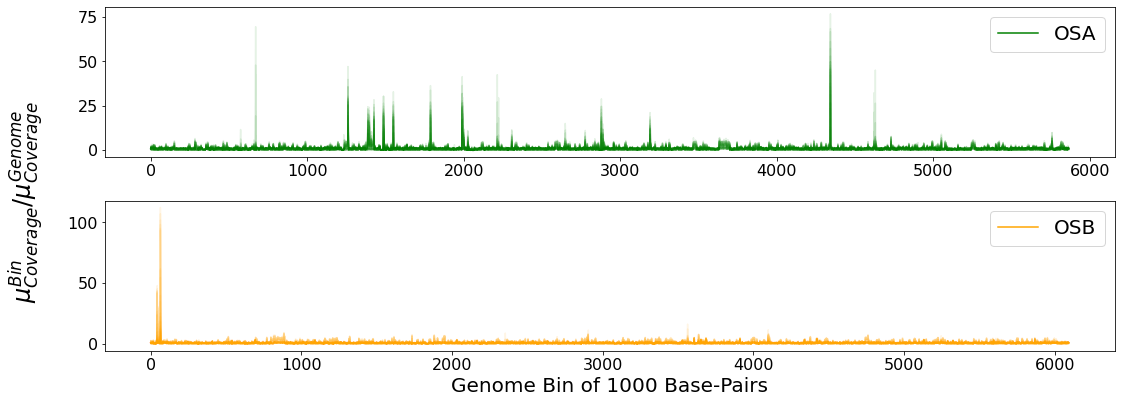

In [13]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).mean()[w-1::w]/OSA_averages.mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).mean()[w-1::w]/OSB_averages.mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,6))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc=1)

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc=1)
fig.supylabel(r'$\mu_{Coverage}^{Bin}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Genome Bin of 1000 Base-Pairs')
fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Bin-Coverage-Mean.pdf')
del OSA_bin_avg_mat, OSB_bin_avg_mat

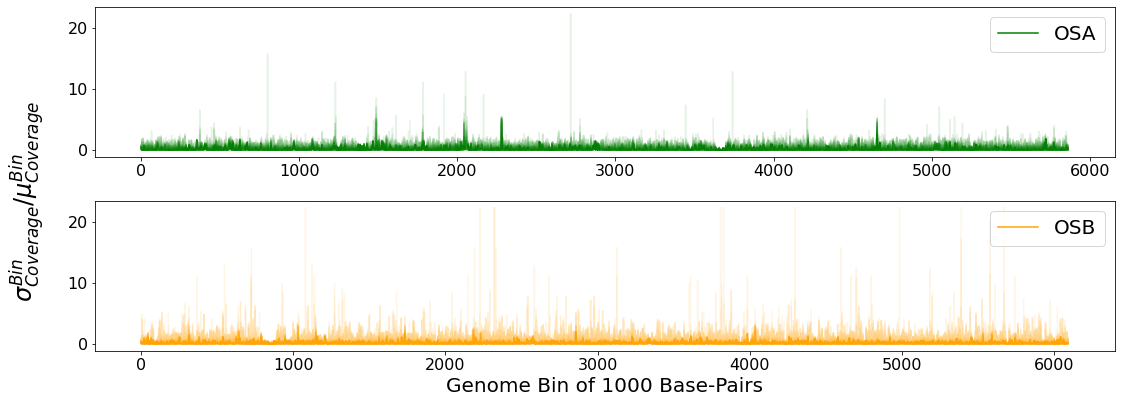

In [14]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).std()[w-1::w]/OSA_averages.rolling(w).mean()[w-1::w]).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).std()[w-1::w]/OSB_averages.rolling(w).mean()[w-1::w]).values.T

fig,ax = plt.subplots(2,1,figsize = (16,6))

ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc = 1)

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc = 1)
   
fig.supylabel(r'$\sigma_{Coverage}^{Bin}/\mu_{Coverage}^{Bin}$')
ax[1].set_xlabel('Genome Bin of 1000 Base-Pairs')

fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Bin-Coverage-CV.pdf')
del OSA_bin_avg_mat, OSB_bin_avg_mat


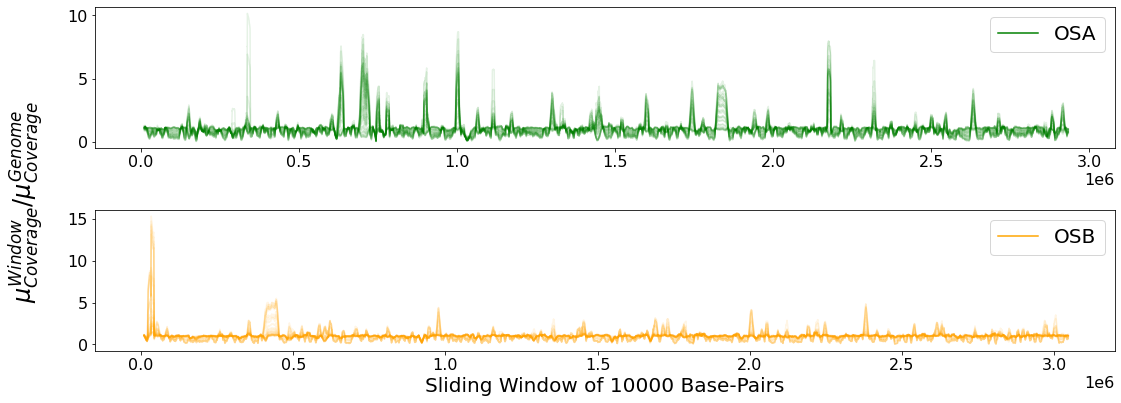

In [15]:
w = 10000

OSA_bin_avg_mat = (OSA_averages.rolling(w).mean()/OSA_averages.mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).mean()/OSB_averages.mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,6))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1)
    ctr += 1    
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend()  
ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend()

fig.supylabel(r'$\mu_{Coverage}^{Window}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Sliding Window of 10000 Base-Pairs')

fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Rolling-Coverage-Mean.pdf')

del OSA_bin_avg_mat, OSB_bin_avg_mat


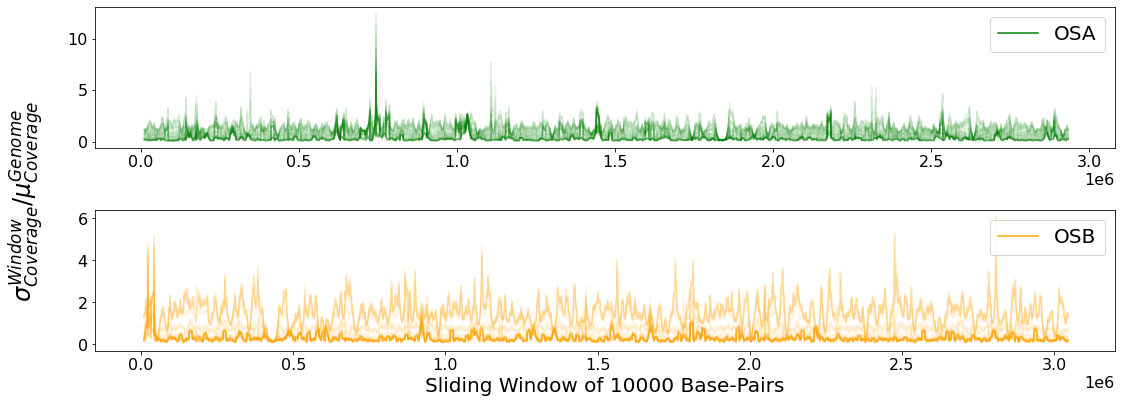

In [16]:
OSA_bin_avg_mat = (OSA_averages.rolling(w).std()/OSA_averages.rolling(w).mean()).values.T
OSB_bin_avg_mat = (OSB_averages.rolling(w).std()/OSB_averages.rolling(w).mean()).values.T

fig,ax = plt.subplots(2,1,figsize = (16,6))
ctr = 0
for i in range(0, len(OSA_bin_avg_mat)):
    ax[0].plot(OSA_bin_avg_mat[i], color = 'green', alpha = 0.1)
    ctr += 1
ax[0].plot(0,0, color = 'green', label = 'OSA')
ax[0].legend(loc = 1) 

ctr = 0
for i in range(0, len(OSB_bin_avg_mat)):
    ax[1].plot(OSB_bin_avg_mat[i], color = 'orange', alpha = 0.1)
    ctr += 1
ax[1].plot(0,0, color = 'orange', label = 'OSB')
ax[1].legend(loc = 1)

fig.supylabel(r'$\sigma_{Coverage}^{Window}/\mu_{Coverage}^{Genome}$')
ax[1].set_xlabel('Sliding Window of 10000 Base-Pairs')

fig.tight_layout()
fig.savefig('Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Rolling-Coverage-CV.pdf')

del OSA_bin_avg_mat, OSB_bin_avg_mat
